In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

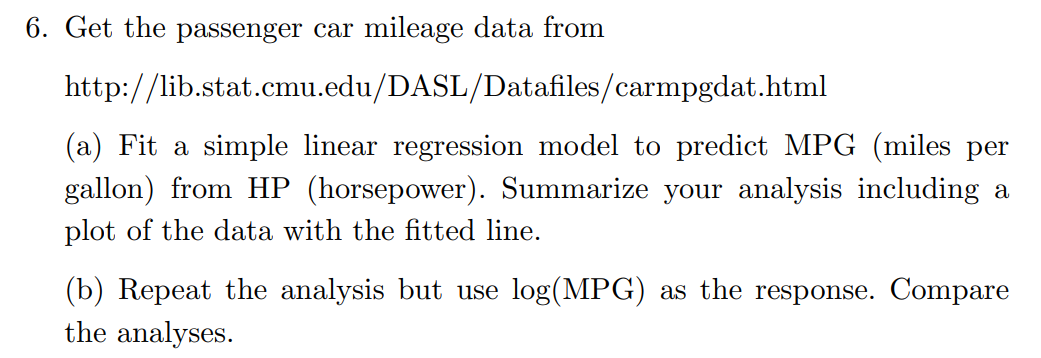

In [38]:
milagedata = pd.read_csv('carmileage.txt', sep='\t')
milagedata.head()

,MAKE,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0


In [39]:
milagedata.describe()

,VOL,HP,MPG,SP,WT
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,98.804878,117.134146,33.781707,112.414634,30.914634
std,22.166285,56.840857,10.004605,14.037825,8.141422
min,50.000000,49.000000,13.200000,90.000000,17.500000
25%,89.500000,84.000000,27.775000,105.000000,25.000000
50%,101.000000,99.000000,32.450000,109.000000,30.000000
75%,113.000000,140.000000,39.300000,114.750000,35.000000
max,160.000000,322.000000,65.400000,165.000000,55.000000


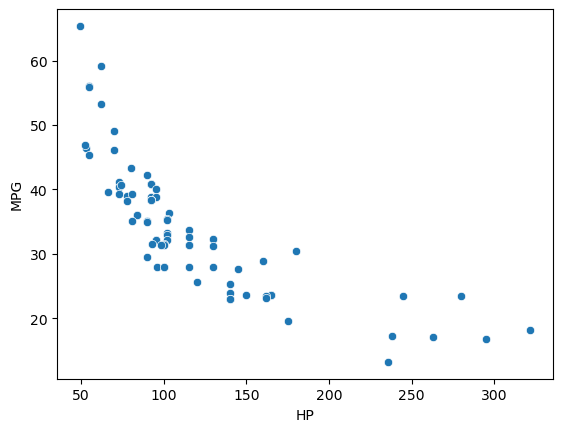

In [40]:
sns.scatterplot(x=milagedata['HP'], y=milagedata['MPG'])
plt.show()

In [41]:
def linear_regression(X, Y):
    if len(X.shape) == 1:
        X = X.reshape(len(X), 1)
    X = np.insert(X, 0, 1, axis = 1)
    n, k = X.shape
    assert(len(Y) == n)
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    Yhat = X @ beta
    training_error = np.sum((Y - Yhat)  ** 2)
    sigmahat = np.sqrt(np.sum((Y - Yhat)  ** 2) / (n - k))
    betavar = sigmahat ** 2 * np.linalg.inv(X.T @ X)
    mallow_score = training_error + 2 * k * sigmahat
    zl_score = training_error + k * sigmahat ** 2 * np.log(n)
    return {'Yhat': Yhat,
            'beta': beta,
            'sigmahat': sigmahat,
            'betavar': betavar,
            'training error': training_error,
            'MallowScore': mallow_score,
            'ZL Score': zl_score}


In [42]:
X = milagedata['HP'].to_numpy()
Y = milagedata['MPG'].to_numpy()
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

In [43]:
dict

{'Yhat': array([43.25393838, 42.41979883, 42.41979883, 40.33444995, 42.69784535,
        40.33444995, 42.41979883, 41.44663602, 41.44663602, 38.94421736,
        39.91738017, 37.27593825, 37.27593825, 39.91738017, 40.89054298,
        39.91738017, 39.22226388, 37.27593825, 39.22226388, 37.55398477,
        37.27593825, 39.77835691, 36.85886847, 38.8051941 , 36.85886847,
        37.27593825, 37.27593825, 37.27593825, 37.55398477, 42.83686861,
        35.7466824 , 38.38812432, 38.38812432, 35.88570566, 35.88570566,
        38.8051941 , 37.55398477, 37.55398477, 35.88570566, 35.88570566,
        31.99305441, 36.85886847, 36.85886847, 35.88570566, 36.85886847,
        37.13691499, 36.16375218, 36.16375218, 36.4417987 , 31.99305441,
        34.0784033 , 34.0784033 , 34.0784033 , 34.0784033 , 25.04189147,
        27.82235665, 31.99305441, 36.71984522, 34.0784033 , 36.16375218,
        36.16375218, 29.90770553, 33.383287  , 30.60282182, 30.60282182,
        29.21258923, 27.12724035, 27.127240

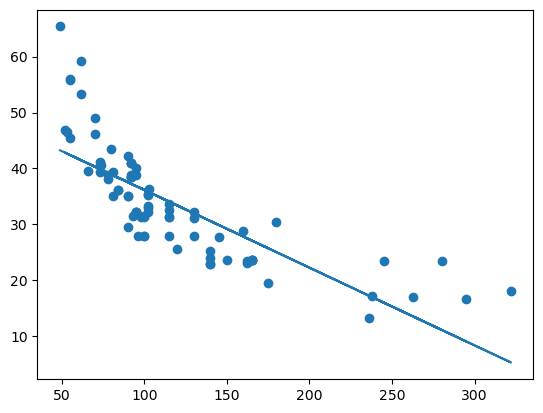

In [44]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [45]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.15e-18
Time:                        10:15:01   Log-Likelihood:                -264.61
No. Observations:                  82   AIC:                             533.2
Df Residuals:                      80   BIC:                             538.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0661      1.569     31.900      0.000      46.943      53.189
x1            -0.1390      0.012    -11.519      0.000      -0.163      -0.115
==============================================================================
Omnibus:                       22.759   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.329
Skew:                           1.246   Prob(JB):                     1.57e-07
Kurtosis:                       4.722   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
X = np.log(milagedata['HP'].to_numpy())
Y = np.log(milagedata['MPG'].to_numpy())
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

(82,)
[ 6.59910712 -0.66873817]
0.12379025804170313
[[ 0.02399946 -0.00509842]
 [-0.00509842  0.0010916 ]]
0.15491757744179618 0.033039428410674705


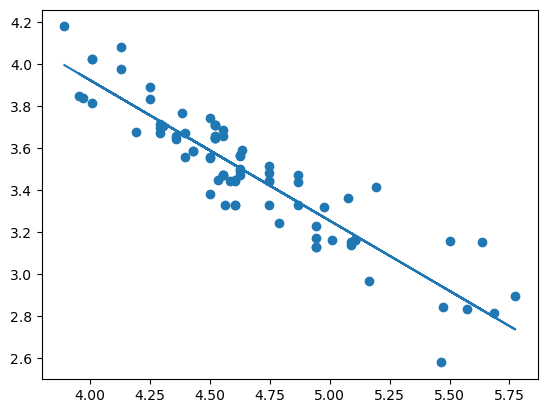

In [47]:
plt.scatter(X, Y)
print(X.shape)
print(beta)
plt.plot(X, Yhat)
print(sigmahat)
print(betavar)
print(np.sqrt(betavar[0, 0]), np.sqrt(betavar[1, 1]))

(10000,)
(10000, 2)
(2,) (10000, 2)
0.12379025804170313
[[ 0.02399946 -0.00509842]
 [-0.00509842  0.0010916 ]]
0.15491757744179618 0.033039428410674705


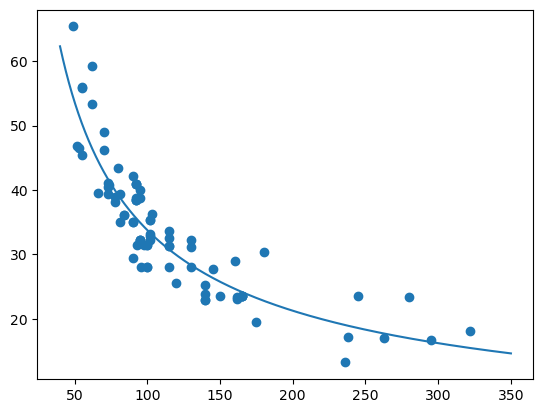

In [48]:
plt.scatter(np.exp(X), np.exp(Y))
logxfit = np.log(np.linspace(40, 350, 10000))
print(logxfit.shape)
logxfitandones = logxfit.reshape(len(logxfit), 1)
logxfitandones = np.insert(logxfitandones, 0, 1, axis = 1)
print(logxfitandones.shape)
print(beta.shape, logxfitandones.shape)
logyfit = beta @ logxfitandones.T
plt.plot(np.exp(logxfit), np.exp(logyfit))
print(sigmahat)
print(betavar)
print(np.sqrt(betavar[0, 0]), np.sqrt(betavar[1, 1]))

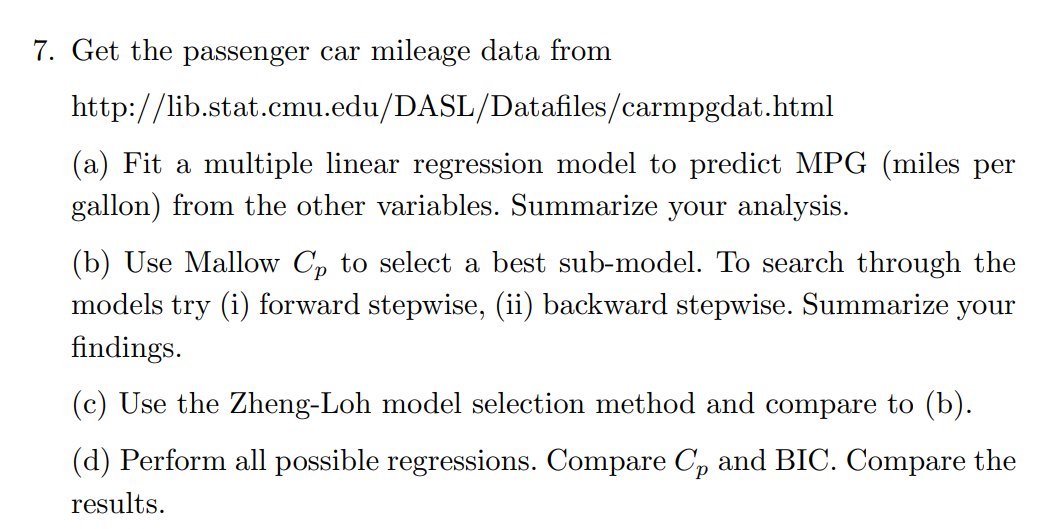

In [49]:
milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].head()

,VOL,HP,SP,WT
0,89,49,96,17.5
1,92,55,97,20.0
2,92,55,97,20.0
3,92,70,105,20.0
4,92,53,96,20.0


In [50]:
Y = milagedata.dropna()['MPG'].to_numpy()
X = milagedata.dropna().loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].to_numpy()

In [51]:
dict = linear_regression(X, Y)
Yhat = dict['Yhat']
beta = dict['beta']
sigmahat = dict['sigmahat']
betavar = dict['betavar']

In [52]:
dict

{'Yhat': array([53.41461168, 49.77662274, 49.77662274, 45.30125964, 50.28701659,
        45.34819468, 49.77662274, 47.23487162, 47.23487162, 41.95294649,
        44.46495926, 39.5789639 , 38.81235835, 44.46495926, 45.60392849,
        44.46495926, 42.51027537, 39.5789639 , 42.51027537, 38.49511826,
        38.04730446, 42.515689  , 37.8978329 , 40.25399642, 38.08557304,
        38.81391001, 37.76569426, 38.04730446, 38.51076327, 43.52744705,
        34.99733356, 39.0891508 , 39.29253594, 36.05638983, 35.80606965,
        39.41071748, 37.80828943, 37.96473955, 34.16861259, 34.16861259,
        30.81368408, 34.88516652, 34.9946816 , 34.07474253, 35.2762918 ,
        35.56765549, 34.47562129, 34.28788116, 34.9234351 , 30.90755415,
        29.73367888, 29.73367888, 29.73367888, 29.37384362, 23.96409573,
        26.47839726, 27.48811747, 31.48617934, 29.73367888, 30.43410162,
        28.81073791, 27.10059495, 24.7506836 , 23.29652538, 23.42168547,
        23.49064321, 24.01053134, 23.009250

[ 1.92437753e+02 -1.56450113e-02  3.92212315e-01 -1.29481848e+00
 -1.85980373e+00]


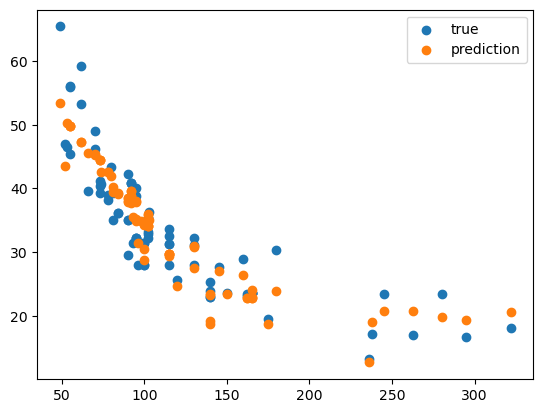

[]

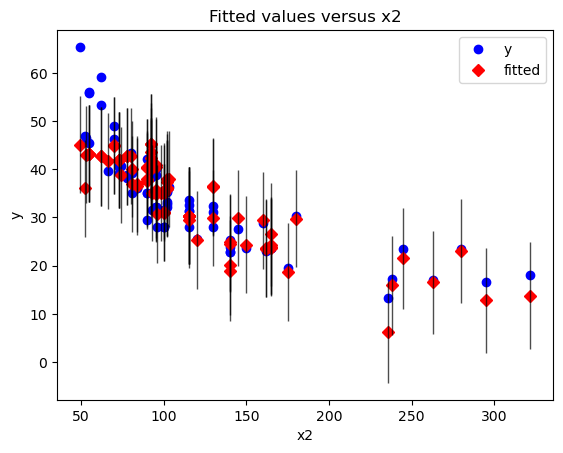

In [53]:
print(beta)
plt.scatter(X[:,1], Y, label = 'true')
plt.scatter(X[:,1], Yhat, label = 'prediction')
plt.legend()
plt.show()

results = sm.OLS(Y, X).fit()
sm.graphics.plot_fit(results, 1)
plt.plot()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1013.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                    2.27e-66
Time:                        10:15:02   Log-Likelihood:                         -245.63
No. Observations:                  82   AIC:                                      499.3
Df Residuals:                      78   BIC:                                      508.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0352      0.031     -1.143      0.257      -0.097       0.026
x2            -0.2612      0.021    -12.296      0.000      -0.303      -0.219
x3             0.6991      0.029     23.826      0.000       0.641       0.758
x4            -0.3490      0.145     -2.407      0.018      -0.638      -0.060
==============================================================================
Omnibus:                       44.046   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.428
Skew:                           1.846   Prob(JB):                     7.07e-27
Kurtosis:                       7.649   Cond. No.                         53.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
def mallowscore(df, ycol, xcols, sigmahat):

    X = df.loc[:, df.columns.isin(xcols)].to_numpy()
    Y = df[ycol].to_numpy()
    S = len(xcols) + 1
    results = linear_regression(X, Y)
    training_error = results['training error']
    return training_error + 2 * S * sigmahat
    

In [56]:
from itertools import chain, combinations


Find best from all combinations:

In [57]:
mallowscores = []

for S in chain.from_iterable(combinations(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns, r) for r in range(5)):
    mallowscores.append([S, mallowscore(milagedata, 'MPG', list(S), sigmahat)])

mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])

mallow_scores.describe()
print('best = ')
mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]

best = 


S               (HP, SP, WT)
Mallow Score     1062.871976
Name: 14, dtype: object

In [58]:
mallow_scores

,S,Mallow Score
0,(),8114.768070
1,"(VOL,)",7020.463604
2,"(HP,)",3064.046130
3,"(SP,)",4279.475162
4,"(WT,)",1480.612647
5,"(VOL, HP)",2296.684008
6,"(VOL, SP)",2998.459686
7,"(VOL, WT)",1484.035459
8,"(HP, SP)",2378.439670
9,"(HP, WT)",1452.538339


Foward Stepwise:

In [59]:
mallowscores = []
goodcols = []
currbest = np.inf
best = mallowscore(milagedata, 'MPG', [], sigmahat)
col = []
currbestS = []

print(best)
print(col)

while best < currbest:
    currbestS = col
    goodcols = goodcols + col
    currbest = best
    mallowscores = []
    for S in combinations(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'] + goodcols)].columns, 1):
        mallowscores.append([list(S), mallowscore(milagedata, 'MPG', goodcols + list(S), sigmahat)])
    mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])
    print(mallow_scores)
    best = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['Mallow Score']
    print(best)
    col = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['S']
    print(col + goodcols)
print('\n\n','results:\n\n','best = ', currbest)
print(currbestS)


8114.7680702905645
[]
       S  Mallow Score
0  [VOL]   7020.463604
1   [HP]   3064.046130
2   [SP]   4279.475162
3   [WT]   1480.612647
1480.6126466821545
['WT']
       S  Mallow Score
0  [VOL]   1484.035459
1   [HP]   1452.538339
2   [SP]   1404.937341
1404.9373414756105
['SP', 'WT']
       S  Mallow Score
0  [VOL]   1366.276109
1   [HP]   1062.871976
1062.87197567911
['HP', 'WT', 'SP']
       S  Mallow Score
0  [VOL]   1063.909024
1063.9090238296378
['VOL', 'WT', 'SP', 'HP']


 results:

 best =  1062.87197567911
['HP']


Backwards stepwise:

In [60]:
mallowscores = []
goodcols = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)
currbest = np.inf
best = mallowscore(milagedata, 'MPG', goodcols, sigmahat)
col = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)
currbestS = list(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns)

print(best)
print(col)

while best < currbest:
    currbestS = col
    goodcols = col
    currbest = best
    mallowscores = []
    remainingdata = milagedata[goodcols]
    for S in combinations(remainingdata.columns, len(remainingdata.columns) - 1):
        mallowscores.append([list(S), mallowscore(milagedata, 'MPG', list(S), sigmahat)])
    mallow_scores = pd.DataFrame(mallowscores, columns=['S', 'Mallow Score'])
    print(mallow_scores)
    best = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['Mallow Score']
    print(best)
    col = mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]['S']
    print(col)
print('\n\n','results:\n\n','best = ', currbest)
print(currbestS)

1063.9090238296378
['VOL', 'HP', 'SP', 'WT']
               S  Mallow Score
0  [VOL, HP, SP]   2070.367626
1  [VOL, HP, WT]   1429.965432
2  [VOL, SP, WT]   1366.276109
3   [HP, SP, WT]   1062.871976
1062.87197567911
['HP', 'SP', 'WT']
          S  Mallow Score
0  [HP, SP]   2378.439670
1  [HP, WT]   1452.538339
2  [SP, WT]   1404.937341
1404.9373414756105
['SP', 'WT']


 results:

 best =  1062.87197567911
['HP', 'SP', 'WT']


Zheng Loh method:

In [61]:
df = milagedata.dropna()

X = df.loc[:, ~df.columns.isin(['MPG', 'MAKE', 'MODEL'])]
Y = df['MPG']

results = sm.OLS(Y, sm.add_constant(X.to_numpy())).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           9.98e-34
Time:                        10:15:02   Log-Likelihood:                -220.00
No. Observations:                  82   AIC:                             450.0
Df Residuals:                      77   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.4378     23.532      8.178      0.000     145.580     239.295
x1            -0.0156      0.023     -0.685      0.495      -0.061       0.030
x2             0.3922      0.081      4.818      0.000       0.230       0.554
x3            -1.2948      0.245     -5.290      0.000      -1.782      -0.807
x4            -1.8598      0.213     -8.717      0.000      -2.285      -1.435
==============================================================================
Omnibus:                       14.205   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.605
Skew:                           0.784   Prob(JB):                     9.12e-05
Kurtosis:                       4.729   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
results.tvalues
wald_stats = pd.DataFrame({"col": X.columns.to_list(),
              "t-value": np.abs(results.tvalues[1:])}).sort_values(by='t-value', ascending=False)

In [63]:
wald_stats

,col,t-value
x4,WT,8.716617
x3,SP,5.289864
x2,HP,4.817602
x1,VOL,0.685425


In [64]:
def ZL_score(X, Y):
    results = sm.OLS(Y, sm.add_constant(X.to_numpy())).fit()
    wald_stats = pd.DataFrame({"col": X.columns.to_list(),
              "t-value": np.abs(results.tvalues[1:])}).sort_values(by='t-value', ascending=False)
    cols = wald_stats['col'].to_list()
    k = len(wald_stats)
    n = results.nobs
    best = np.inf
    jhat = 0
    sigmahat = np.sum(results.resid ** 2)/(n - k - 1)
    for j in range(0, k+1):
        trial = linear_regression(X.loc[:, ~X.columns.isin(cols[:j])].to_numpy(), Y)
        training_error = trial['training error']
        sigmahat = trial['sigmahat']
        print(sigmahat)
        score = training_error + j * sigmahat ** 2 * np.log(n)
        if score < best:
            jhat = j
        print("j = {}, score = {}".format(j, score))
    return jhat



In [65]:
ZL_score(X, Y)

3.6527546574777587
j = 0, score = 1027.3814772548603
5.115518857964562
j = 1, score = 2156.462967387164
5.366053024957094
j = 2, score = 2528.546255919533
9.358053073252707
j = 3, score = 8163.583539486375
10.004605458608298
j = 4, score = 9871.774230799094


4

In [66]:
def BIC_score(df, ycol, xcols):
    df = df.dropna()
    Y = df[ycol].to_numpy()
    X = df.loc[:, df.columns.isin(xcols)].to_numpy()
    S = len(xcols) + 1
    reg = sm.OLS(Y, sm.add_constant(X)).fit()
    return reg.llf - np.log(reg.nobs) * (len(X) + 1) / 2

In [67]:
scorelist = []
BICscores = []
for S in chain.from_iterable(combinations(milagedata.loc[:, ~milagedata.columns.isin(['MPG', 'MAKE', 'MODEL'])].columns, r) for r in range(5)):
    scorelist.append([S, mallowscore(milagedata, 'MPG', list(S), sigmahat), BIC_score(milagedata, 'MPG', list(S))])

scores = pd.DataFrame(scorelist, columns=['S', 'Mallow Score', 'BIC'])

scores.describe()
print('best = ')
#mallow_scores.iloc[mallow_scores['Mallow Score'].idxmin()]

best = 


In [68]:
scores

,S,Mallow Score,BIC
0,(),8114.768070,-487.578468
1,"(VOL,)",7020.463604,-481.590867
2,"(HP,)",3064.046130,-447.487497
3,"(SP,)",4279.475162,-461.241109
4,"(WT,)",1480.612647,-417.458373
5,"(VOL, HP)",2296.684008,-435.471277
6,"(VOL, SP)",2998.459686,-446.495553
7,"(VOL, WT)",1484.035459,-417.349641
8,"(HP, SP)",2378.439670,-436.918965
9,"(HP, WT)",1452.538339,-416.456762


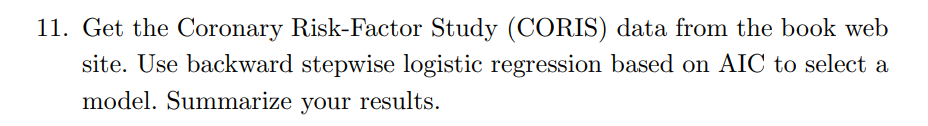

In [313]:
chd_data = pd.read_csv('coris.txt', sep='\t')
Y = chd_data['chd']
X = chd_data.loc[:, chd_data.columns != 'chd']

In [314]:
def logit(p):
    return np.log(p / (1 - p))

In [381]:
def predict(X, Y, beta):

    p = np.exp(X @ beta) / (1 + np.exp(X @ beta))

    W = np.diag(p * (1 - p))
    #print(W)

    num = Y - p
    denom = p * (1 - p)
    Z = logit(p) + num / denom

    beta_next = np.linalg.inv(np.transpose(X) @ W @ X) @ (np.transpose(X) @ W @ Z)

    loss = - np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p)) / len(Y)
    accuracy = np.sum((p > 0.5) * Y + (p < 0.5) * (1 -Y)) / len(Y)
    return p, beta_next, loss, accuracy

In [382]:
book_beta = np.array([-6.145, 0.007, 0.079, 0.174, 0.019, 0.925, 0.04, -0.063, 0.000, 0.045])

book_predictions = predict(np.insert(X.to_numpy(), 0, 1, axis = 1), Y.to_numpy(), book_beta)

In [383]:
bookp, _, bookloss, bookaccuracy = book_predictions

print(bookloss)
print(bookaccuracy)

0.5117038392899309
0.7359307359307359


In [397]:
def logistic_regression(X, Y, steps = 100, record_loss = False):

    if len(X.shape) == 1:
        X = X.reshape(len(X), 1)
    X = np.insert(X, 0, 1, axis = 1)
    n, k = X.shape

    #beta = np.random.uniform(low = -1, high = 1, size = k)
    #beta[0] = -5
    beta = 0.5 * book_beta
    losses = np.array([])
    accuracies = np.array([])

    for _ in range(steps):
        p, beta_next, loss, accuracy = predict(X, Y, beta)
        if record_loss:
            losses = np.append(losses, loss)
            accuracies = np.append(accuracies, accuracy)
        beta = beta_next

    return p, beta, losses, accuracies
        

In [398]:
p, beta, losses, accuracies = logistic_regression(X.to_numpy(), Y.to_numpy(), steps=30, record_loss=True)
print(losses[-1])
print(accuracies[-1])

0.5109740610091968
0.7337662337662337


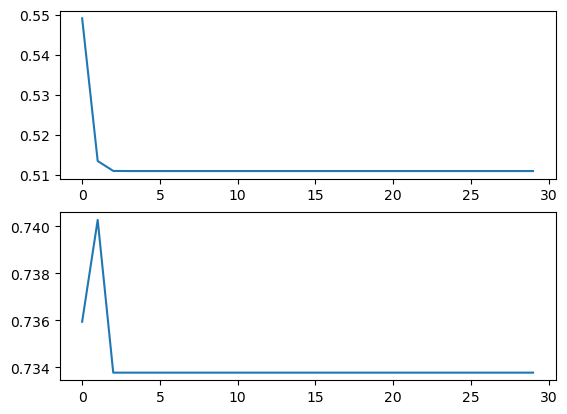

In [400]:
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.subplot(2, 1, 2)
plt.plot(accuracies)
#plt.yscale('log')

In [401]:
print(beta)

[-6.15072086e+00  6.50401713e-03  7.93764457e-02  1.73923898e-01
  1.85865682e-02  9.25370419e-01  3.95950250e-02 -6.29098693e-02
  1.21662401e-04  4.52253496e-02]


In [278]:
result = pd.DataFrame(np.array([Y, (p>0.5)]).T, columns=['Y','p'])

In [279]:
result.describe()

,Y,p
count,462.000000,462.000000
mean,0.346320,0.919913
std,0.476313,0.271721
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [284]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import Dense

In [298]:
def tf_model(input_size):
    input = tfl.Input(input_size)
    output = Dense(units = 2, activation = 'softmax')(input)
    return tf.keras.Model(inputs=input, outputs=output)

In [299]:
Model = tf_model(9)
Model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [305]:
Model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [404]:
history=Model.fit(X, Y,batch_size=1, epochs=30)
#history = Model.fit(X, Y)

Epoch 1/30
462/462 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.7359
Epoch 2/30
462/462 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.6861
Epoch 3/30
462/462 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6991
Epoch 4/30
462/462 [==============================] - 1s 1ms/step - loss: 0.5904 - accuracy: 0.7186
Epoch 5/30
462/462 [==============================] - 1s 1ms/step - loss: 0.5843 - accuracy: 0.7056
Epoch 6/30
462/462 [==============================] - 1s 1ms/step - loss: 0.6126 - accuracy: 0.6732
Epoch 7/30
462/462 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.6970
Epoch 8/30
462/462 [==============================] - 1s 1ms/step - loss: 0.6117 - accuracy: 0.7294
Epoch 9/30
462/462 [==============================] - 1s 1ms/step - loss: 0.6056 - accuracy: 0.7078
Epoch 10/30
462/462 [==============================] - 1s 1ms/step - loss: 0.5917 - accuracy: 0.6840

In [416]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [433]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [434]:
xgc = XGBClassifier()

history = xgc.fit(X_train, Y_train)

In [435]:
predictions = xgc.predict(X_test)

In [436]:
accuracy_score(Y_test, predictions)

0.6906474820143885